# 🏅 US vs. USSR/Russia in the Summer Olympics

Introduction 

The United States has consistently been one of the top medal winners in the Summer Olympics.  
But when did the U.S. really start to pull away from the rest of the world?  
And how much did global events — like the collapse of the Soviet Union — shape the medal race?  

This notebook explores the US-USSR Olympic rivalry, adjusting for instances like **team sports artificially boosting medal counts**, and looks for the turning point where the U.S. separated from its competitors.  


## Introduce the data  

We’re working with the [Summer Olympics dataset](https://www.kaggle.com/datasets/the-guardian/olympic-games?select=summer.csv).  
Key columns include:  

- **Year** – the Olympic year  
- **City** – the host city  
- **Sport** – the competition information  
- **Athlete** – athlete’s name  
- **Country** – athlete’s country  
- **Medal** – type of medal (Gold, Silver, Bronze)  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("summer.csv")

In [4]:
df.shape

(31165, 9)

We can see that this dataset isn't too much to handle, with only 31165 rows and 9 columns of data. Up next is the preprocessing! First I checked df.info() to see if there were any discrepancies in the data. I found that the "Country" column was four short of the total, only containing 31161 rows of non-null data. Because there were only four null values, I decided to drop them, as they wouldn't have much effect on the overall analysis. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

To make sure that these null values were dropped, I created a clean dataset variable(df_cleaned), that dropped the null values from the "Country" column. When checking the shape, the total rows comes out to 31161, which is what we want. Now, we have a clean dataset with no null values to work with!

In [7]:
df_cleaned = df.dropna(subset=['Country'])

In [8]:
df_cleaned.shape

(31161, 9)

Initial Visualization

First, I want to display the top 10 countries by medals, showing that the United States has a very dominant lead. The Soviet Union, while not being in existance since 1991, is still in second place(as of the 2012 Olympics). Based on the graph, we can see that the United States has over double the medals that even its closest competitors.

In [9]:
medal_counts_by_country = df_cleaned['Country'].value_counts().head(10)


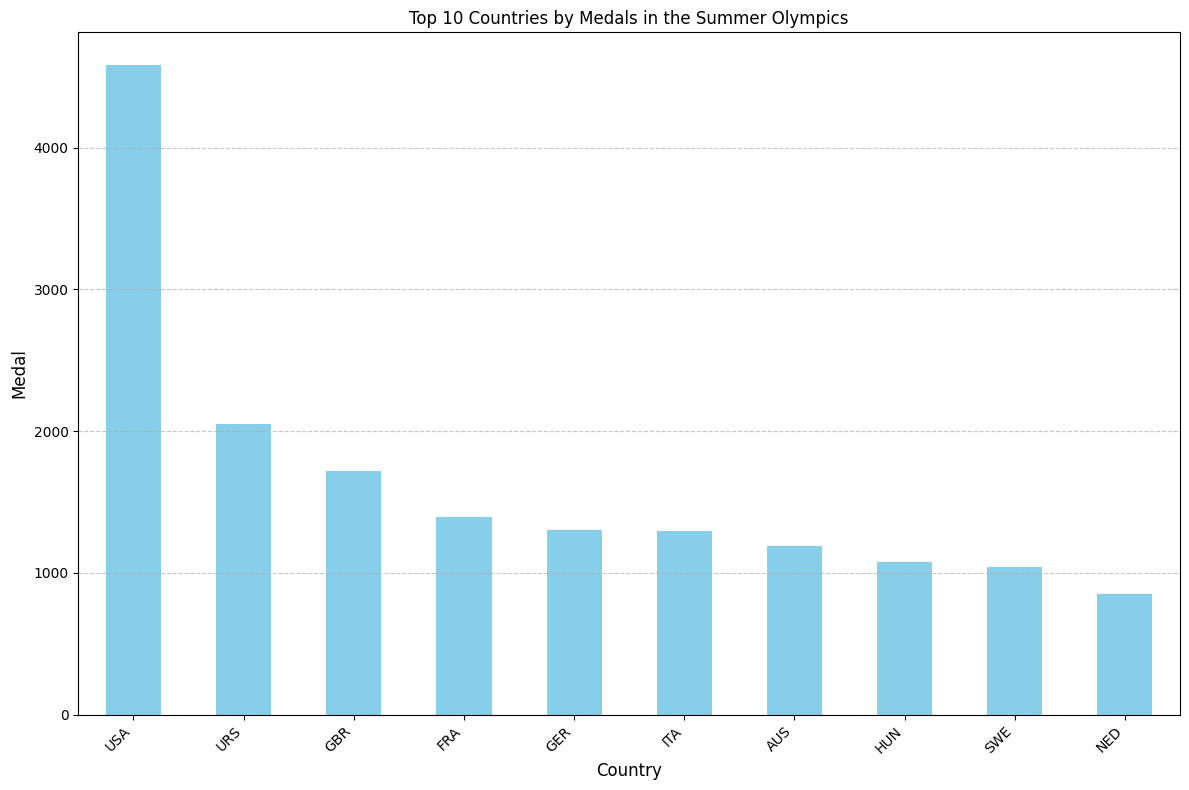

In [10]:
plt.figure(figsize=(12,8))
medal_counts_by_country.plot(kind='bar' , color='skyblue')
plt.title('Top 10 Countries by Medals in the Summer Olympics')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Medal', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Next, I wanted to clean up this chart so that it would show a breakdown of each nations' medals in terms of totals by Gold, Silver and Bronze. 

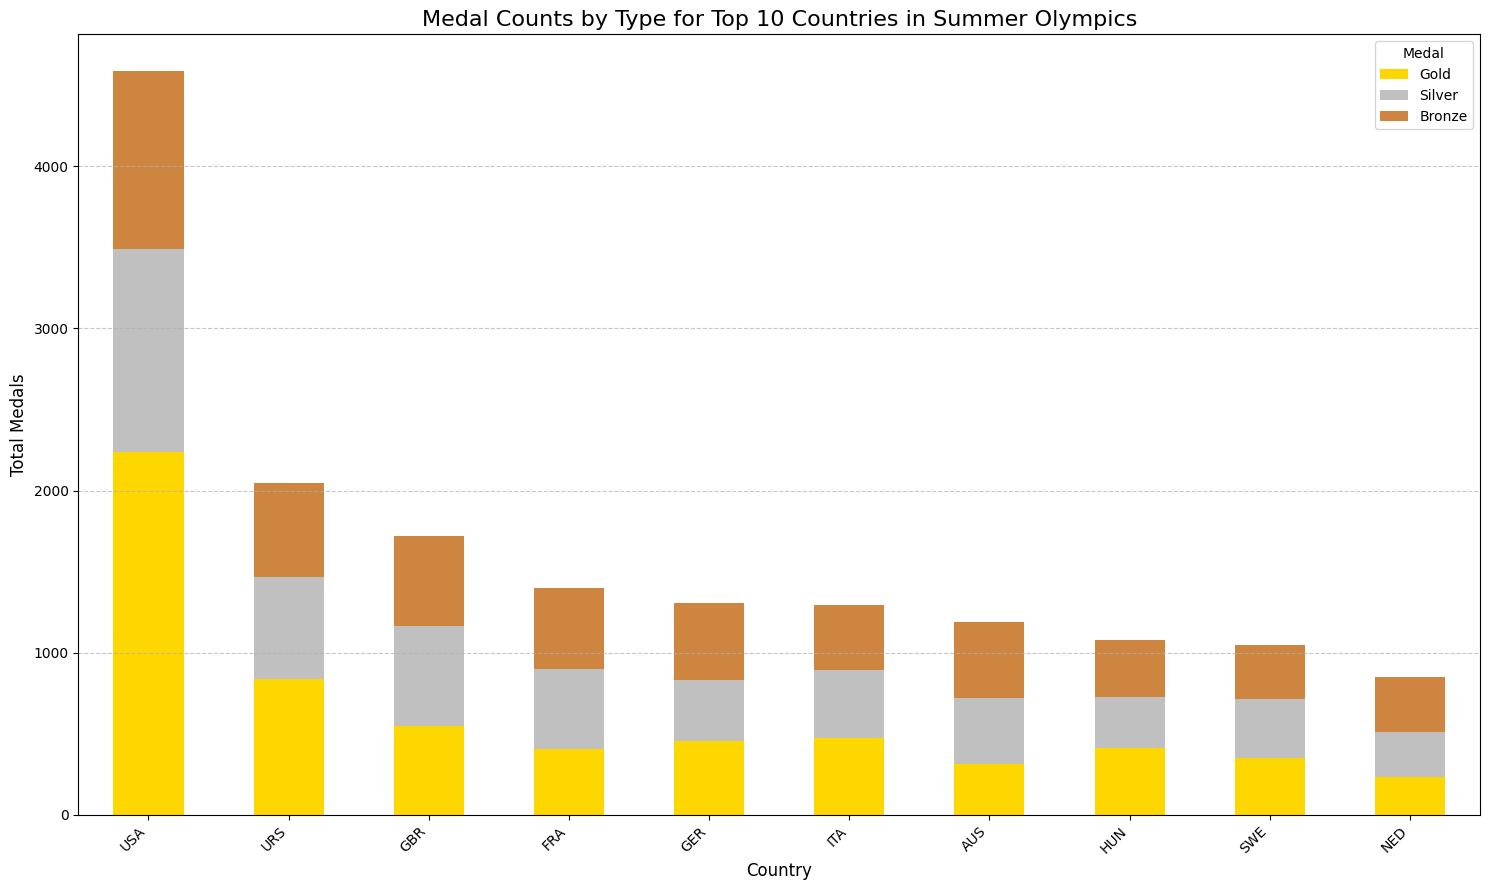

In [11]:
# Group by country and medal, then count the occurrences
country_medal_counts = df_cleaned.groupby(['Country', 'Medal']).size().unstack(fill_value=0)

# Reorder the columns to Gold, Silver, Bronze for a logical stack order
country_medal_counts = country_medal_counts[['Gold', 'Silver', 'Bronze']]

# Calculate the total medals for each country and get the top 10
country_medal_counts['Total'] = country_medal_counts.sum(axis=1)
top_10_countries = country_medal_counts.sort_values(by='Total', ascending=False).head(10)
top_10_countries = top_10_countries.drop('Total', axis=1)

# Create the stacked bar chart
plt.figure(figsize=(15, 9))
top_10_countries.plot(kind='bar', stacked=True, color=['gold', 'silver', 'peru'], ax=plt.gca())
plt.title('Medal Counts by Type for Top 10 Countries in Summer Olympics', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Medal')
plt.tight_layout()

USSR/Russia vs. United States

This next section is change over time in terms of medals earned by the Soviet Union, the United States, and the Russian Federation. The vertical line at 1991 visualizes the collapse of the Soviet Union. However, the data is a tiny bit skewed, as some team sports (basketball, swimming, rowing, etc) bestow multiple medals of the same type on the victorious team. This artificially inflates medal numbers for nations who excel at team sports like Russia, the USSR and the United States. 


In [12]:
urs_medals = df_cleaned[df_cleaned['Country'] == 'URS'].groupby('Year')['Medal'].count()
rus_medals = df_cleaned[df_cleaned['Country'] == 'RUS'].groupby('Year')['Medal'].count()
usa_medals = df_cleaned[df_cleaned['Country'] == 'USA'].groupby('Year')['Medal'].count()

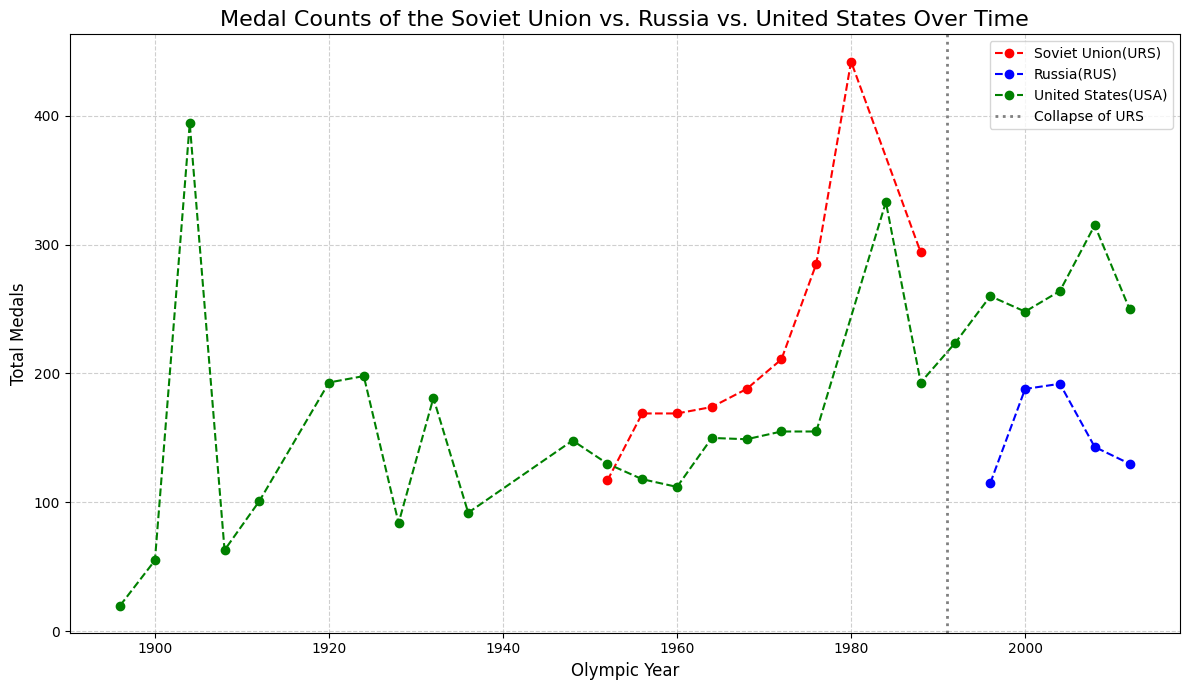

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(urs_medals.index, urs_medals.values, marker='o', label='Soviet Union(URS)', linestyle='--', color='red')
plt.plot(rus_medals.index, rus_medals.values, marker='o', label='Russia(RUS)', linestyle='--', color='blue')
plt.plot(usa_medals.index, usa_medals.values, marker='o', label='United States(USA)', linestyle='--', color='green')


plt.axvline(x=1991, color='grey', linestyle=':', linewidth=2, label='Collapse of URS')
plt.title('Medal Counts of the Soviet Union vs. Russia vs. United States Over Time', fontsize=16)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Because of this possible skew in information, I dropped the duplicates that were caused by team sports, which gives a more accurate representation of how many medals a nation truly has. 

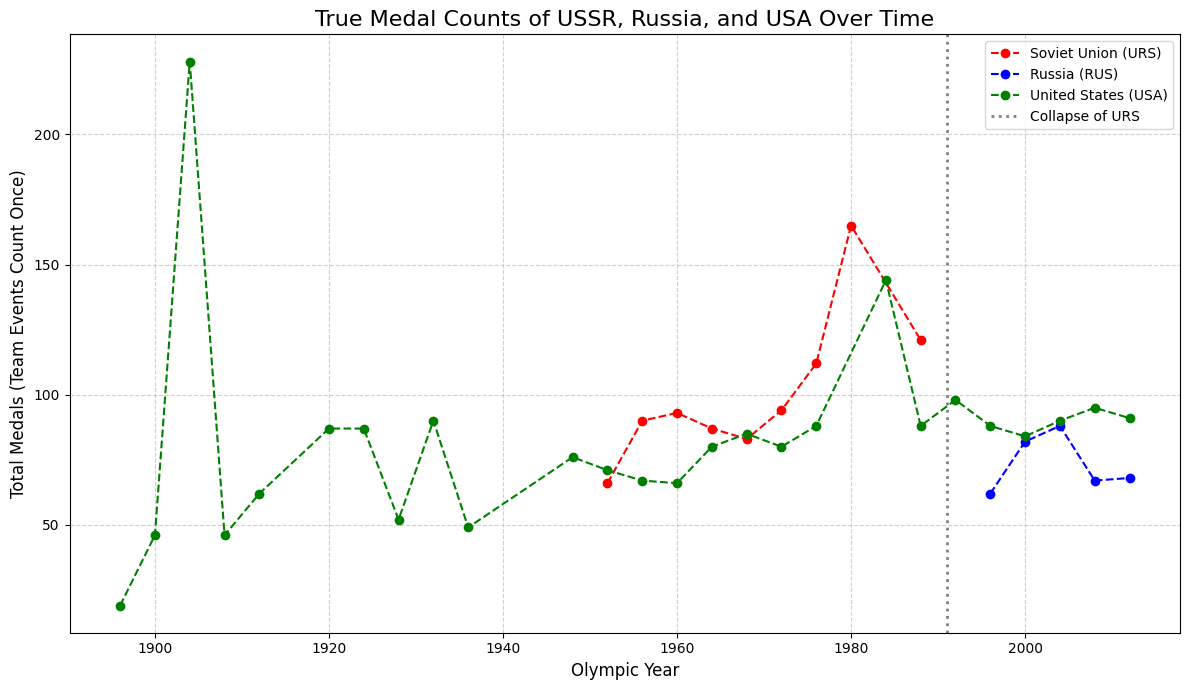

In [19]:
# --- Deduplicated Medal Counts (True Medals) ---
df_dedup = df_cleaned.drop_duplicates(subset=['Year', 'Event', 'Medal', 'Country'])

urs_medals_true = df_dedup[df_dedup['Country'] == 'URS'].groupby('Year')['Medal'].count()
rus_medals_true = df_dedup[df_dedup['Country'] == 'RUS'].groupby('Year')['Medal'].count()
usa_medals_true = df_dedup[df_dedup['Country'] == 'USA'].groupby('Year')['Medal'].count()

plt.figure(figsize=(12, 7))
plt.plot(urs_medals_true.index, urs_medals_true.values, marker='o', label='Soviet Union (URS)', linestyle='--', color='red')
plt.plot(rus_medals_true.index, rus_medals_true.values, marker='o', label='Russia (RUS)', linestyle='--', color='blue')
plt.plot(usa_medals_true.index, usa_medals_true.values, marker='o', label='United States (USA)', linestyle='--', color='green')

plt.axvline(x=1991, color='grey', linestyle=':', linewidth=2, label='Collapse of URS')
plt.title('True Medal Counts of USSR, Russia, and USA Over Time', fontsize=16)
plt.title('True Medal Counts (Deduplicated) of USSR, Russia, and USA Over Time', fontsize=16)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Total Medals (Team Events Count Once)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Finally, I overlayed the two, to show that the "true" medal count is lower than the "inflated" version. 

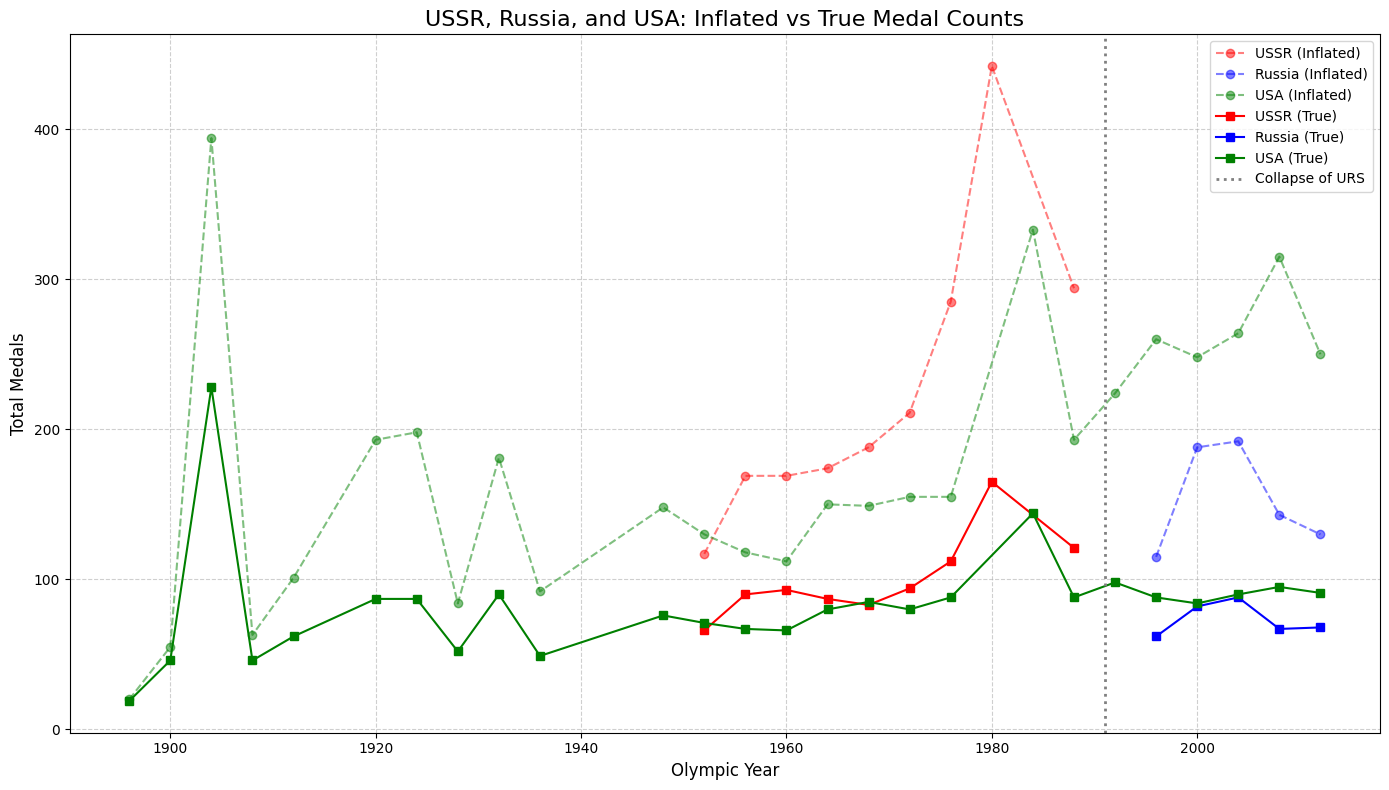

In [15]:
# --- Deduplicated Medal Counts (True Medals) ---
df_dedup = df_cleaned.drop_duplicates(subset=['Year', 'Event', 'Medal', 'Country'])

urs_medals_true = df_dedup[df_dedup['Country'] == 'URS'].groupby('Year')['Medal'].count()
rus_medals_true = df_dedup[df_dedup['Country'] == 'RUS'].groupby('Year')['Medal'].count()
usa_medals_true = df_dedup[df_dedup['Country'] == 'USA'].groupby('Year')['Medal'].count()

# --- Overlay Comparison Plot ---
plt.figure(figsize=(14, 8))

# Inflated counts (athlete-level)
plt.plot(urs_medals.index, urs_medals.values, marker='o', label='USSR (Inflated)', linestyle='--', color='red', alpha=0.5)
plt.plot(rus_medals.index, rus_medals.values, marker='o', label='Russia (Inflated)', linestyle='--', color='blue', alpha=0.5)
plt.plot(usa_medals.index, usa_medals.values, marker='o', label='USA (Inflated)', linestyle='--', color='green', alpha=0.5)

# True counts (deduplicated)
plt.plot(urs_medals_true.index, urs_medals_true.values, marker='s', label='USSR (True)', color='red')
plt.plot(rus_medals_true.index, rus_medals_true.values, marker='s', label='Russia (True)', color='blue')
plt.plot(usa_medals_true.index, usa_medals_true.values, marker='s', label='USA (True)', color='green')

# Collapse of Soviet Union marker
plt.axvline(x=1991, color='grey', linestyle=':', linewidth=2, label='Collapse of URS')

plt.title('USSR, Russia, and USA: Inflated vs True Medal Counts', fontsize=16)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Conclusion  

The data suggests a clear **turning point in the early 1990s**, coinciding with the **collapse of the Soviet Union**.  
Without its biggest rival, the U.S. was free to dominate medal counts for years.  

Even after adjusting for team sports, the United States consistently holds the top spot, proving that its dominance is not just a result of the scoring system.  


